In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
#sns.set_style("grid")
plt.rcParams.update({"font.size":18,
                   "figure.figsize":(17,9)})

In [2]:
def load_data(name, x="TraceA(Hz)", y="TraceA(dBm)", x_new="Hz",y_new="dBm"):
    p="pruebas_spectrum_analyzer"
    data=pd.read_csv("{}/{}.csv".format(p,name),skiprows=9, usecols=[x, y])
    data.rename(columns={x:x_new,
                        y:y_new}, inplace=True)
    return data

# Onda sinusoidal en spectrum analyzer

In [3]:
data = load_data("señal_sinusoidal")

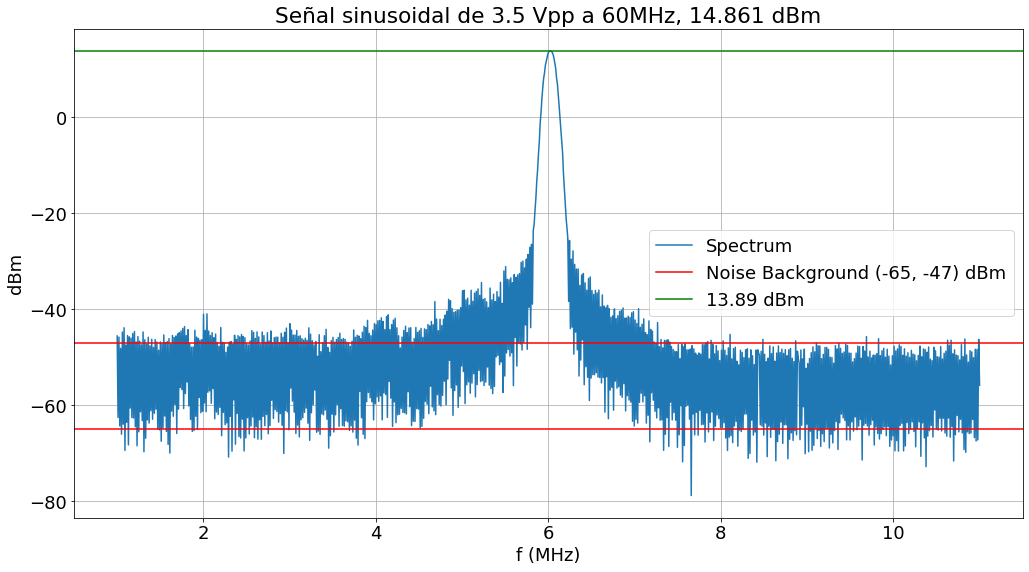

In [4]:
vpp=3.5
R=50
Vrms=vpp/(2*np.sqrt(2))
P=Vrms**2/R
P_miliwats=P*1000
P_dBm=10*np.log10(P_miliwats)


xvalues=[2e7, 4e7, 6e7,8e7,10e7]
xlabels=["2","4","6","8","10"]
ax=data.plot(x="Hz", y="dBm", label="Spectrum")
upper_level=-47
lower_level=-65

ax.axhline(upper_level,c="red", label="Noise Background ({}, {}) dBm".format(lower_level,upper_level))
ax.axhline(lower_level,c="red")
maximo=data["dBm"].max()
ax.axhline(maximo, c="green", label="{} dBm".format(maximo))
plt.xlabel("f (MHz)")
plt.ylabel("dBm")
plt.title("Señal sinusoidal de 3.5 Vpp a 60MHz, {} dBm".format(round(P_dBm,3)))
plt.grid(True)
plt.xticks(xvalues,xlabels)
plt.legend()
plt.show()

In [5]:
data_2=load_data("señal_sinusoidal_2", y="TraceA(mV)", y_new="mV")

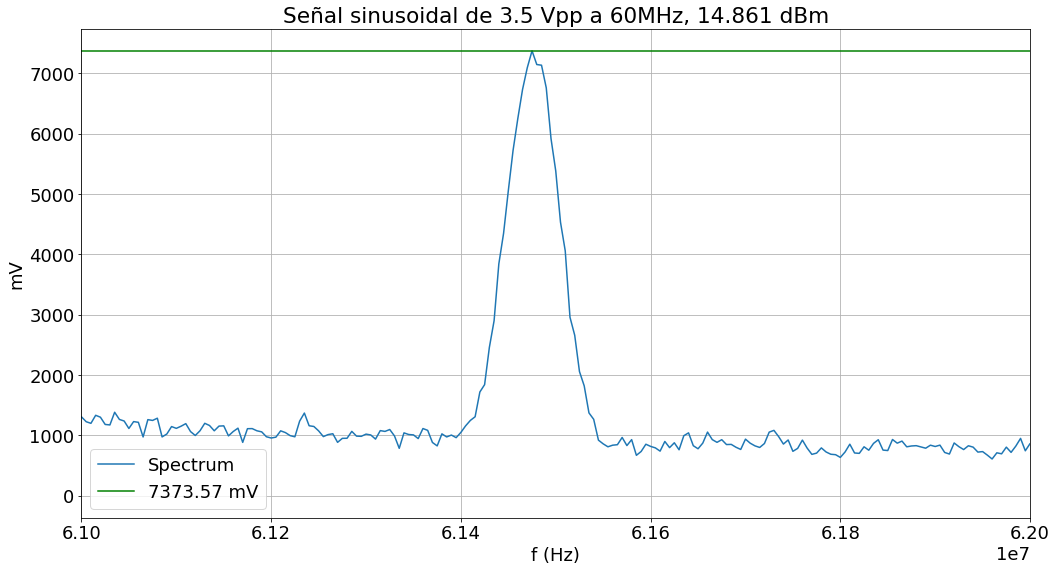

In [9]:

ax=data_2.plot(x="Hz", y="mV", label="Spectrum")
upper_level=-47
lower_level=-65

#ax.axhline(upper_level,c="red", label="Noise Background ({}, {}) dBm".format(lower_level,upper_level))
#ax.axhline(lower_level,c="red")
maximo=data_2["mV"].max()
ax.axhline(maximo, c="green", label="{} mV".format(maximo))
plt.xlabel("f (Hz)")
plt.ylabel("mV")
plt.title("Señal sinusoidal de 3.5 Vpp a 60MHz, {} dBm".format(round(P_dBm,3)))
plt.grid(True)
plt.xlim(6.1e7,6.2e7)


#plt.xticks(xvalues,xlabels)
plt.legend()
plt.show()

In [7]:
data_3=load_data("señal_sinusoidal_3")

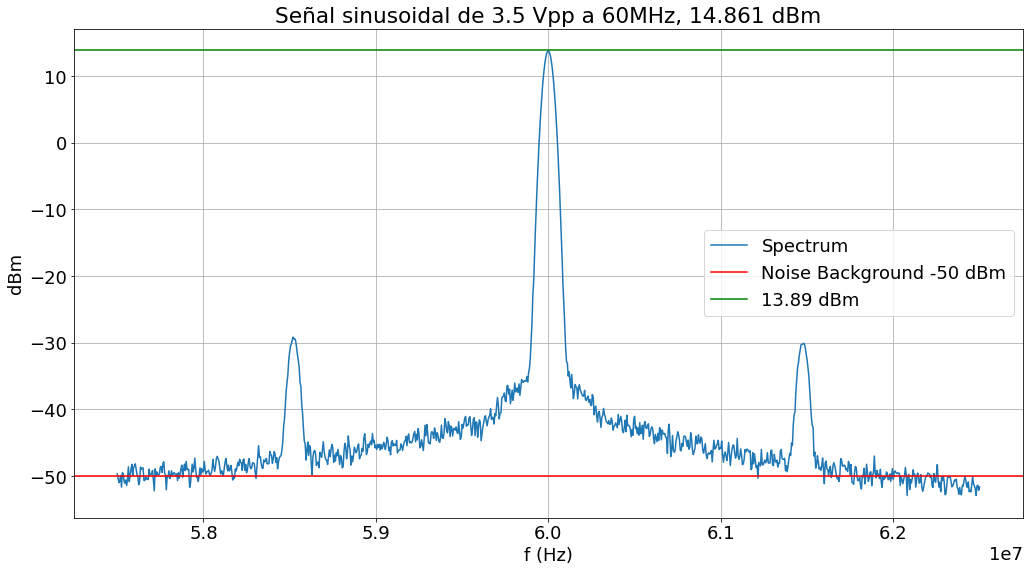

In [8]:

ax=data_3.plot(x="Hz", y="dBm", label="Spectrum")
upper_level=-50
lower_level=-65

ax.axhline(upper_level,c="red", label="Noise Background {} dBm".format(upper_level))
#ax.axhline(lower_level,c="red")
maximo=data["dBm"].max()
ax.axhline(maximo, c="green", label="{} dBm".format(maximo))
plt.xlabel("f (Hz)")
plt.ylabel("dBm")
plt.title("Señal sinusoidal de 3.5 Vpp a 60MHz, {} dBm".format(round(P_dBm,3)))
plt.grid(True)
#plt.xticks(xvalues,xlabels)
plt.legend()
plt.show()

In [3]:
def load_data(name, x="TraceA(Hz)", y="TraceA(dBm)", x_new="Hz",y_new="dBm"):
    p="pruebas_spectrum_analyzer"
    data=pd.read_csv("{}/{}.csv".format(p,name),skiprows=9, usecols=[x, y])
    data.rename(columns={x:x_new,
                        y:y_new}, inplace=True)
    return data

# Noise floor

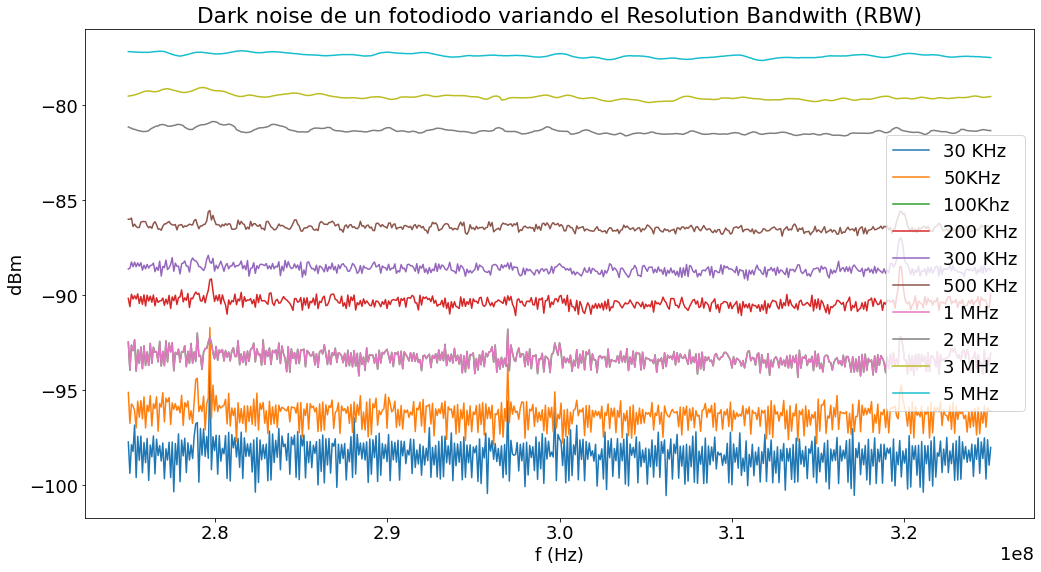

In [10]:
RBW=["30 KHz", "50KHz", "100Khz", "200 KHz", "300 KHz", "500 KHz", "1 MHz","2 MHz", "3 MHz", "5 MHz"]
plt.figure()
for i in range(1,11):
    data= load_data("noise_floor/{}".format(i))
    plt.plot(data["Hz"], data["dBm"], label=RBW[i-1])

plt.ylabel("dBm")
plt.xlabel("f (Hz)")
plt.title("Dark noise de un fotodiodo variando el Resolution Bandwith (RBW)")
plt.legend()

# Señal cuadrada

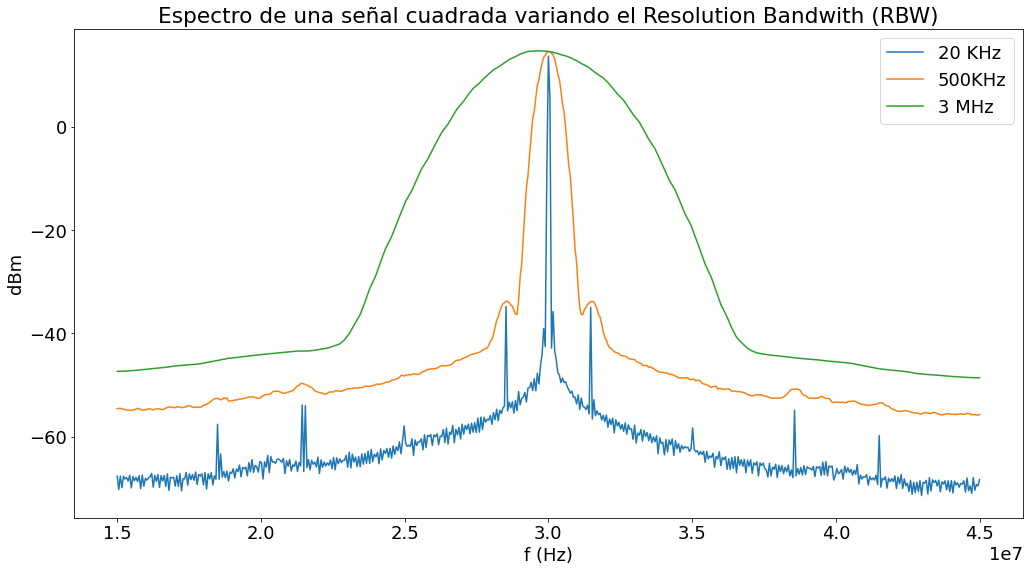

In [11]:
RBW=["20 KHz", "500KHz", "3 MHz"]
plt.figure()
for i in range(1,4):
    data= load_data("señal_cuadrada/{}".format(i))
    plt.plot(data["Hz"], data["dBm"], label=RBW[i-1])

plt.ylabel("dBm")
plt.xlabel("f (Hz)")
plt.title("Espectro de una señal cuadrada variando el Resolution Bandwith (RBW)")
plt.legend()